Naive bayes is used in 
1. Email spam detection
2. Digit/Character recognization
3. Weather prediction
4. Face detection

In [83]:
import pandas as pd 
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt     

In [84]:
df = pd.read_csv('train.csv')
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [85]:
df.drop(['PassengerId','Name','SibSp','Parch','Ticket','Cabin','Embarked'],axis=1,inplace=True)
df.head()

,Survived,Pclass,Sex,Age,Fare
0,0,3,male,22.0,7.2500
1,1,1,female,38.0,71.2833
2,1,3,female,26.0,7.9250
3,1,1,female,35.0,53.1000
4,0,3,male,35.0,8.0500


In [86]:
target = df.Survived
inputs = df.drop('Survived',axis=1)

In [87]:
dummies = pd.get_dummies(inputs.Sex)
dummies = dummies.astype(int)
dummies.head()

,female,male
0,0,1
1,1,0
2,1,0
3,1,0
4,0,1


In [88]:
inputs = pd.concat([inputs,dummies],axis=1)
inputs.head()

,Pclass,Sex,Age,Fare,female,male
0,3,male,22.0,7.2500,0,1
1,1,female,38.0,71.2833,1,0
2,3,female,26.0,7.9250,1,0
3,1,female,35.0,53.1000,1,0
4,3,male,35.0,8.0500,0,1


In [89]:
inputs.drop('Sex',axis=1,inplace=True)
inputs.head()

,Pclass,Age,Fare,female,male
0,3,22.0,7.2500,0,1
1,1,38.0,71.2833,1,0
2,3,26.0,7.9250,1,0
3,1,35.0,53.1000,1,0
4,3,35.0,8.0500,0,1


In [90]:
inputs.isna().sum()

Pclass      0
Age       177
Fare        0
female      0
male        0
dtype: int64

In [91]:
inputs.Age = inputs.Age.fillna(inputs.Age.mean())
inputs.head()

,Pclass,Age,Fare,female,male
0,3,22.0,7.2500,0,1
1,1,38.0,71.2833,1,0
2,3,26.0,7.9250,1,0
3,1,35.0,53.1000,1,0
4,3,35.0,8.0500,0,1


In [92]:
from sklearn.model_selection import train_test_split

In [93]:
X_train, X_test, y_train, y_test = train_test_split(inputs,target,test_size=0.3,random_state=42)

In [94]:
from sklearn.naive_bayes import GaussianNB

In [95]:
model = GaussianNB()

In [96]:
model.fit(X_train,y_train)

GaussianNB()

In [97]:
model.score(X_test,y_test)

0.7873134328358209

In [100]:
X_test[:10]

,Pclass,Age,Fare,female,male
709,3,29.699118,15.2458,0,1
439,2,31.000000,10.5000,0,1
840,3,20.000000,7.9250,0,1
720,2,6.000000,33.0000,1,0
39,3,14.000000,11.2417,1,0
290,1,26.000000,78.8500,1,0
300,3,29.699118,7.7500,1,0
333,3,16.000000,18.0000,0,1
208,3,16.000000,7.7500,1,0
136,1,19.000000,26.2833,1,0


In [99]:
model.predict(X_test[:10])

array([0, 0, 0, 1, 1, 1, 1, 0, 1, 1], dtype=int64)

In [101]:
model.predict_proba(X_test[:10])

array([[0.99069126, 0.00930874],
       [0.98045868, 0.01954132],
       [0.98846413, 0.01153587],
       [0.0169045 , 0.9830955 ],
       [0.0543304 , 0.9456696 ],
       [0.00200164, 0.99799836],
       [0.07571196, 0.92428804],
       [0.98741304, 0.01258696],
       [0.05691198, 0.94308802],
       [0.00895237, 0.99104763]])

In [102]:
y_pred = model.predict(X_test)

In [106]:
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score,ConfusionMatrixDisplay

In [105]:
cm = confusion_matrix(y_test,y_pred)
ac = accuracy_score(y_test,y_pred)
print(ac)
print(classification_report(y_test,y_pred))

0.7873134328358209
              precision    recall  f1-score   support

           0       0.82      0.82      0.82       157
           1       0.75      0.74      0.74       111

    accuracy                           0.79       268
   macro avg       0.78      0.78      0.78       268
weighted avg       0.79      0.79      0.79       268



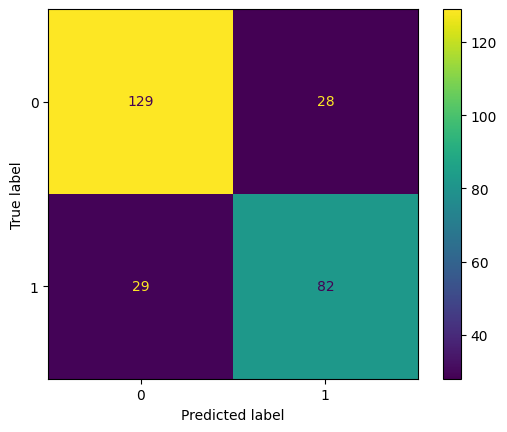

In [107]:
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()